# **Healthcare Insurance Cost Analysis**

## Objectives ##

For this project I will be focusing on 3 main objectives. They are:
* 1. Does smoking have an impact on insurance charges.
* 2. Identify how insurance charges vary across different regions
* 3. Explore the relationship between BMI and insurance charges

Here are my hypothesis' for each one and how I am going to validate each one.
1. **Hypothesis:** Smokers have significantly higher insurance charges than non-smokers.
   - **Validation** Use boxplots to visualise the distribution of charges for smokers vs non-smokers
2. **Hypothesis** Insurance charges vary by geographic region.
   - **Validation:** Calculate and visualize the average charges per region using a bar chart.
3. **Hypothesis:** There is a positive correlation between BMI and insurance charges, especially for smokers.
   - **Validation:** Create a scatter plot of BMI vs. insurance charges, coloured by smoking status, and add a regression line to visually assess the trend between BMI and charges.



---

# Section 1 - Extracting Data

In this section, I:
- Imported all required Python libraries for data analysis and visualisation (pandas, NumPy, matplotlib, seaborn, plotly).
- Loaded the dataset from the `data` folder.
- Displayed the first few rows of the dataset to understand its structure.
- Checked the column types and number of non-null values using `.info()`.
- Used `.describe()` to get summary statistics of numeric variables.

Import the packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Extract the data

In [2]:
df = pd.read_csv('../data/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Find out basic information about the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Section 2 - Transforming Data

In this section, I performed data cleaning and preparation:
- Confirmed that there are no missing values with `.isnull().sum()`.
- Checked for duplicate records and removed 1 duplicate.


Check for any missing data

In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

---

Check for duplicate rows

In [6]:
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 1


Dropping the duplicated row

In [7]:
df = df.drop_duplicates()

# Section 3 – Data Visualisation

In this section, I created visualisations to explore the three hypotheses from earlier on. These visualisations will help uncover patterns and insights from the data using tools such as Seaborn, Matplotlib, and Plotly.
Each visualisation is designed to validate one of the hypotheses set out at the start of the project.

## 1. Does smoking have an impact on insurance charges?
To investigate this, I will use a **boxplot** to compare the distribution of insurance charges between smokers and non-smokers.

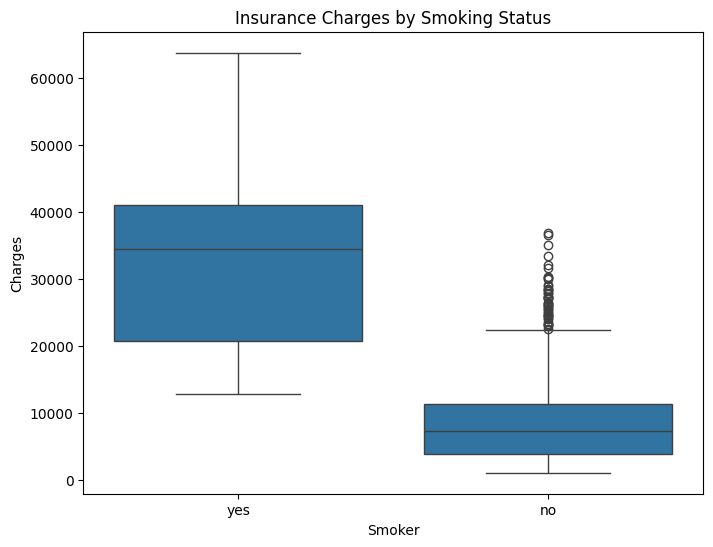

In [8]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='smoker', y='charges')
plt.title('Insurance Charges by Smoking Status')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()

### 2. Do insurance charges vary across different regions?
I will calculate and visualise the **average charges per region** using a bar chart.

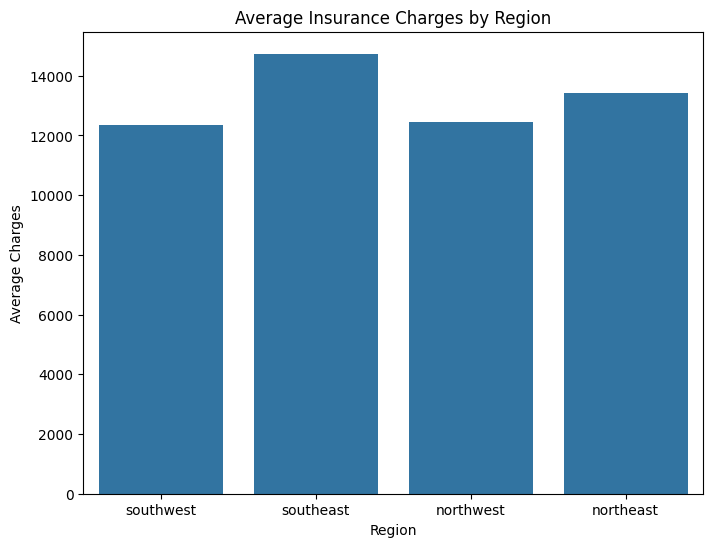

In [9]:
plt.figure(figsize=(8,6))
sns.barplot(data=df,x='region', y='charges', errorbar=None)
plt.title('Average Insurance Charges by Region')
plt.xlabel('Region')
plt.ylabel('Average Charges')
plt.show()

### 3. Is there a relationship between BMI and insurance charges?
I will create a **scatter plot** of BMI vs. charges, coloured by smoking status, and add a trend line. This will help identify whether BMI is positively correlated with charges and if this relationship differs for smokers.

In [10]:
fig = px.scatter(df, x="bmi", y="charges",
    color="smoker",
    title="Insurance Charges by BMI and Smoking Status",
    labels={"bmi": "BMI", "charges": "Charges", "smoker": "Smoking Status"},
    trendline="ols",
    hover_data=["age", "region"])

fig.update_layout(legend=dict(bordercolor="black",borderwidth=1))

fig.show()

---

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Conclusions and Next Steps

* In cases where you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.